<a href="https://colab.research.google.com/github/hamiin47/Assignment/blob/main/ESAA_YB_Week13_1125_markdown.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **03. 평균이동**

**평균 이동의 개요**
- 평균 이동(mean shift)은 K-평균과 유사하게 중심을 군집의 중심으로 지속적으로 움직이면서 군집화를 수행한다.
- 그러나 K-평균이 중심에 소속된 데이터의 평균 거리 중심으로 이동하는데 반해, 평균 이동은 심을 데이터가 모여 있는 밀도가 가장 높은 곳으로 이동시킨다.
- 평균 이동 군집화는 데이터으 분포도를 이용해 군집 중심점을 찾는다. 군집 중심점은 데이터 포인트가 모여있는 곳이라는 생각에서 착안한 것이며 이를 위해 pdf를 이용한다.
- 가장 집중적으로 데이터가 모여있어 확율 밀도 함수가 피크인 점을 군집 중심점으로 선정하며 일반적으로 주어진 모델의 확률 밀도 함수를 찾기 위해서 KDE를 이용한다. (KDE는 커널 함수를 통해 어떤 변수의 확률 밀도 함수를 추정하는 대표적인 방법으로 관측된 데이터 각각에 커널 함수를 적용한 값을 모두 더한 뒤 데이터 건수로 나눠 확률 밀도 함수를 추정한다)

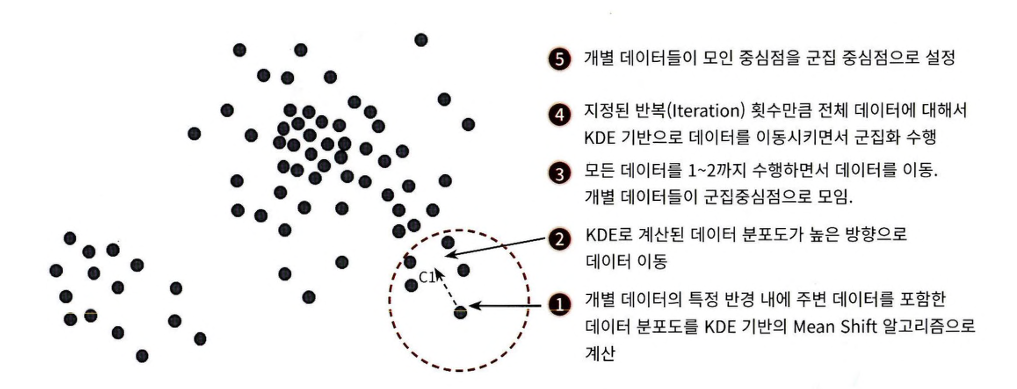

KDE는 개별 관측 데이터에 커널 함수를 적용한 뒤, 이 적용 값을 모두 더한 후 개별 관측 데이터의 건수로 나눠 확률 밀도 함수를 추정하며, 대표적인 커널 함수로서 가우시안 분포 함수가 사용된다.

(왼쪽 그림은 개별 관측 데이터에 가우시안 커널 함수를 적용한 것이고, 오른쪽 그림은 적용 값을 모두 더한 KDE값이다)
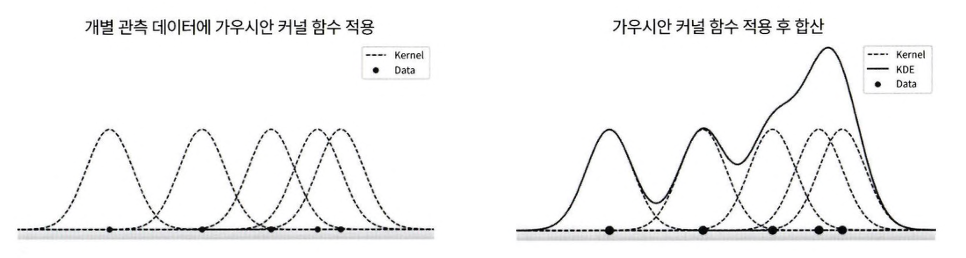

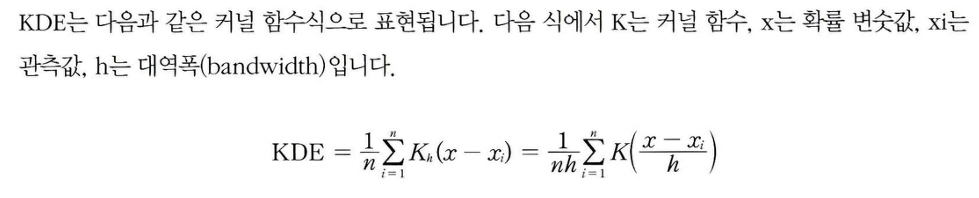

대역폭 오는 KDE 형태를 부드러운(또는 뾰족한) 형태로 평활화(Smoothing)하는 데 적용되며, 이 h를 어떻게 설정하느냐에 따라 확률 밀도 추정 성능을 크게 좌우할 수 있다.
-  작은 h 값(h=1.0)은 좁고 뾰족한 KDE를 가지게 되며, 이는 변동성이 큰 방식으로 확률 밀도 함수를 추정하므로 과적합(over-fitting)하기 쉽다
- 매우 큰 h 값(h=10)은 과도하게 평활화(smoothing)된 KDE로 인해 지나치게 단순화된 방식으로 확률 밀도 함수를 추정하며 결과적으로 과소적합(under-fitting)하기 쉽다.

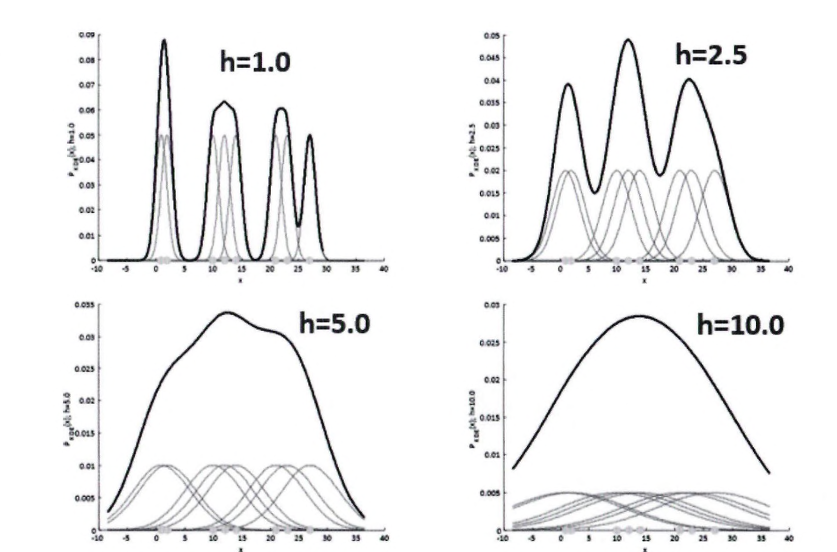

In [1]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import MeanShift

X, y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.7, random_state=0)

meanshift = MeanShift(bandwidth=0.8)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형:', np.unique(cluster_labels))

cluster labels 유형: [0 1 2 3 4 5]


In [2]:
meanshift = MeanShift(bandwidth=1)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형:', np.unique(cluster_labels))

cluster labels 유형: [0 1 2]


In [3]:
from sklearn.cluster import estimate_bandwidth

bandwidth = estimate_bandwidth(X)
print('bandwith 값:', round(bandwidth, 3))

bandwith 값: 1.816


In [4]:
import pandas as pd

clusterDF = pd.DataFrame(data=X, columns=['ftr1','ftr2'])
clusterDF['target'] = y

best_bandwidth = estimate_bandwidth(X)

meanshift = MeanShift(bandwidth = best_bandwidth)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형 : ', np.unique(cluster_labels))

cluster labels 유형 :  [0 1 2]


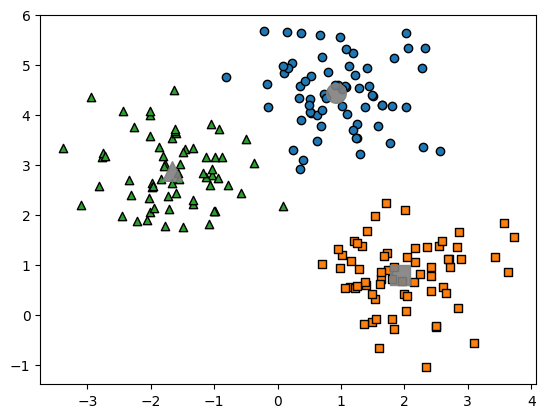

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

clusterDF['meanshift_label'] = cluster_labels
centers = meanshift.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers=['o','s','^','x','*']

for label in unique_labels:
    label_cluster = clusterDF[clusterDF['meanshift_label']==label]
    center_x_y = centers[label]

    # 군집별로 다른 마커로 산점도 적용
    plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k', marker=markers[label])

    # 군집별 중심 표현
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='gray',alpha=0.9, marker=markers[label])
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', marker=''%label)

plt.show()

In [6]:
print(clusterDF.groupby('target')['meanshift_label'].value_counts())

target  meanshift_label
0       0                  67
1       1                  67
2       2                  66
Name: count, dtype: int64


평균 이동의 장점은 데이터 세트의 형태를 특정 형태로 가정한다든가, 특정 분포도 기반의 모델로 가정
하지 않기 때문에 좀 더 유연한 군집화가 가능한 것이다.

그러나, 알고리즘의 수행 시간이 오래 걸리고 무엇보다도 band-width의 크기에 따른 군집화 영향도가 매우 크다.

# **04. GMM(Gaussian Mixture Model)**

**GMM(Gaussian Mixture Model) 소개**

GMM 군집화는 군집화를 적용하고자 하는 데이터가 여러 개의 가우시안 분포(GaussianDistri
bution)를 가진 데이터 집합들이 섞여서 생성된 것이라는 가정하에 군집화를 수행하는 방식이다.

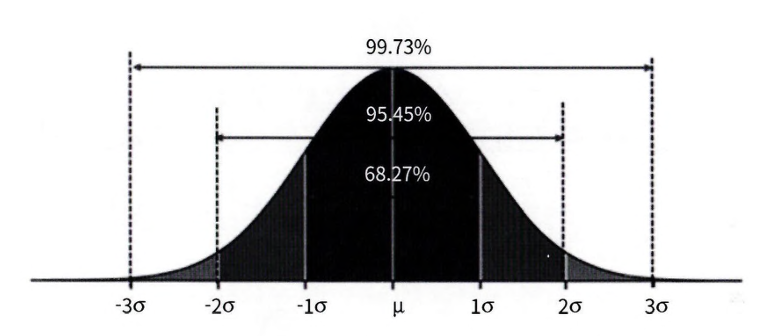

GMM(Gaussian Mixture Model)은 데이터를 여러 개의 가우시안 분포가 섞인 것으로 간주합니다.
섞인 데이터 분포에서 개별 유형의 가우시안 분포를 추출한다.

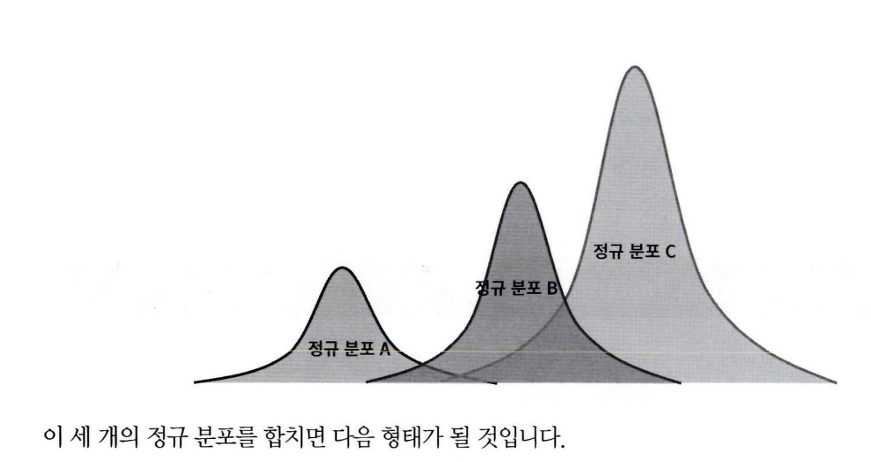

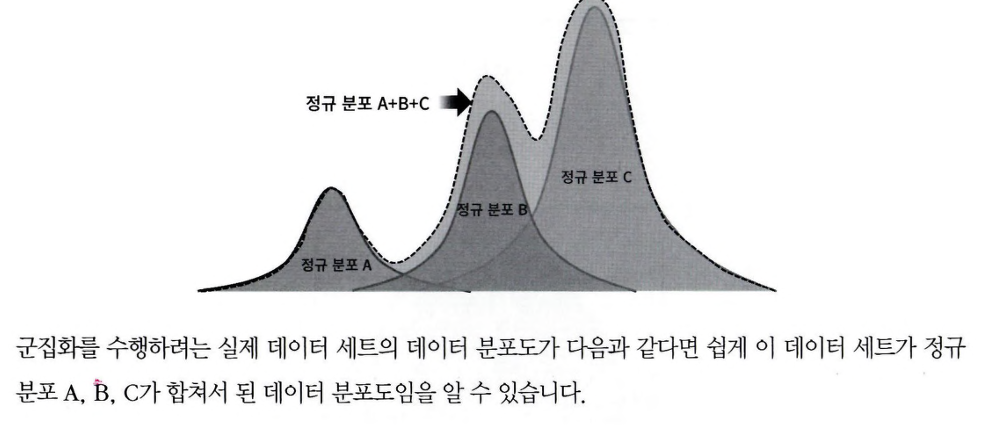

이러한 서로 다른 정규 분포에 기반해 군집화를 수행하는 것이 GMM 군집화 방식이다.
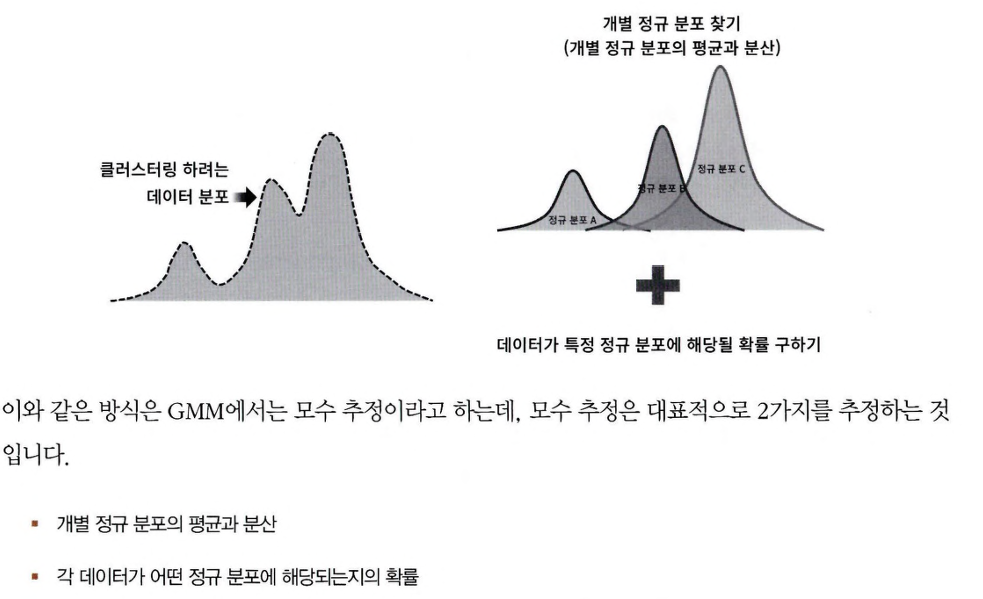

**GMM을 이용한 붓꽃 데이터 세트 군집화**

In [7]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

iris = load_iris()
feature_names = ['sepal_length','sepal_width','petal_length','petal_width']

# 좀 더 편리한 데이터 Handling을 위해 DataFrame으로 변환
irisDF = pd.DataFrame(data=iris.data, columns=feature_names)
irisDF['target'] = iris.target

GaussianMixture 객체의 가장중요한초기화파라미터는 n_components이다. n_components는 gaussian mixture의 모델의 총 개수이다.

In [8]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=3, random_state=0).fit(iris.data)
gmm_cluster_labels = gmm.predict(iris.data)

# 군집화 결과를 irisDF의 'gum_cluster'칼럼명으로 저장
irisDF['gmm_cluster'] = gmm_cluster_labels

# target 값에 따라 gmm_cluster 값이 어떻게 매핑됐는지 확인
iris_result = irisDF.groupby('target')['gmm_cluster'].value_counts()
print(iris_result)

target  gmm_cluster
0       1              50
1       0              45
        2               5
2       2              50
Name: count, dtype: int64


In [9]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0).fit(iris.data)
kmeans_cluster_labels = kmeans.predict(iris.data)
irisDF['kmeans_cluster'] = kmeans_cluster_labels
iris_result = irisDF.groupby('target')['kmeans_cluster'].value_counts()
print(iris_result)

target  kmeans_cluster
0       1                 50
1       0                 47
        2                  3
2       2                 36
        0                 14
Name: count, dtype: int64


**GMM과 K—평균의 비교**

KMeans는 원형의 범위에서 군집화를 수행한다.. 데이터 세트가 원형의 범위를 가질수록 KMeans의 군집화 효율은 더욱 높아진다.

다음은 make_blobs()의 군집의 수를 3개로 하되,cluster_std를 0.5로 설정해 군집 내의 데이터를 뭉치게 유도한 데이터 세트에 KMeans를 적용한 결과이다. 이렇게
cluster_std를 작게 설정하면 데이터가 원형 형태로 분산될 수 있다. 결과를 보면 KMeans로 효과적으로 군집화된 것을 알 수 있다.

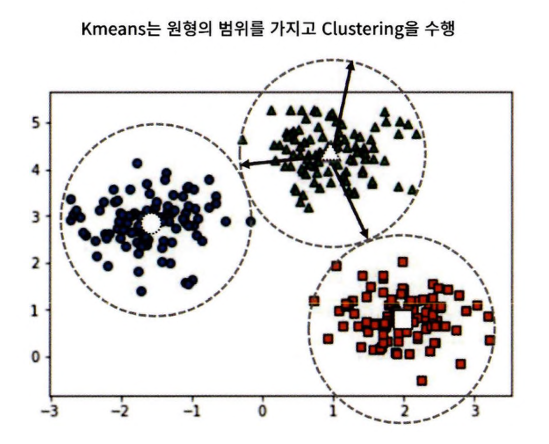

visualize_cluster_plot() 함수는 인자로 다음과 같은 값을 입력받는다.
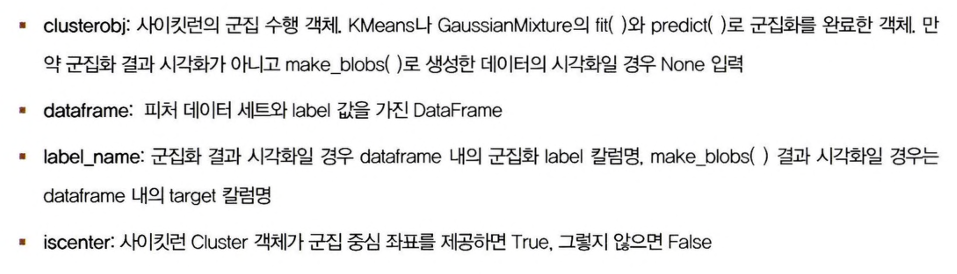

In [10]:
def visualize_cluster_plot(clusterobj, dataframe, label_name, iscenter=True):
    if iscenter :
        centers = clusterobj.cluster_centers_

    unique_labels = np.unique(dataframe[label_name].values)
    markers=['o', 's', '^', 'x', '*']
    isNoise=False

    for label in unique_labels:
        label_cluster = dataframe[dataframe[label_name]==label]
        if label == -1:
            cluster_legend = 'Noise'
            isNoise=True
        else :
            cluster_legend = 'Cluster '+str(label)

        plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], s=70,\
                    edgecolor='k', marker=markers[label], label=cluster_legend)

        if iscenter:
            center_x_y = centers[label]
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=250, color='white',
                        alpha=0.9, edgecolor='k', marker=markers[label])
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k',\
                        edgecolor='k', marker='' % label)
    if isNoise:
        legend_loc='upper center'
    else: legend_loc='upper right'

    plt.legend(loc=legend_loc)
    plt.show()

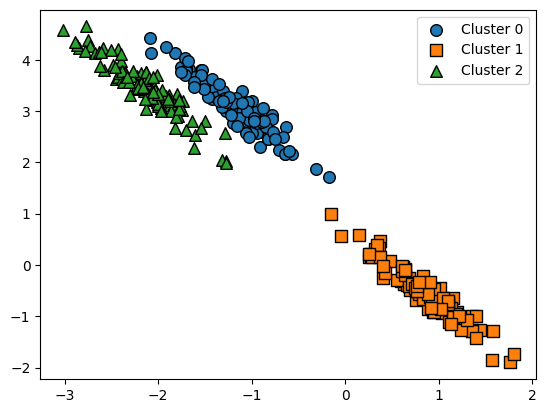

In [11]:
from sklearn.datasets import make_blobs

# make_blobs()로 300개의 데이터 세트, 3개의 군집 세트, cluster_std=0.5를 만듦
X, y = make_blobs(n_samples=300, n_features=2, centers=3, cluster_std=0.5, random_state=0)

# 길게 늘어난 타언형의 데이터 세트를 생성하기 위해 변환
transformation = [[0.60834549, -0.63667341],[-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)
# feature 데이터 세트와 make_blobs( )의 y 결괏값을 DataFrame으로 저장
clusterDF = pd.DataFrame(data=X_aniso, columns=['ftr1','ftr2'])
clusterDF['target'] = y
# 생성된 데이터 세트를 target별로 다른 마커로 표시해 시각화함
visualize_cluster_plot(None, clusterDF, 'target', iscenter=False)

<ipython-input-10-f4c266540d94>:24: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k',\


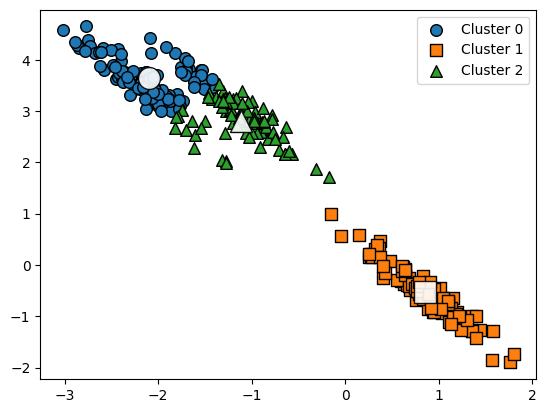

In [12]:
# 3개의 군집 기반 Kmeans를 X_aniso 데이터 세트에 적용

kmeans = KMeans(3, random_state=0)
kmeans_label = kmeans.fit_predict(X_aniso)
clusterDF['kmeans_label'] = kmeans_label

visualize_cluster_plot(kmeans, clusterDF, 'kmeans_label', iscenter=True)

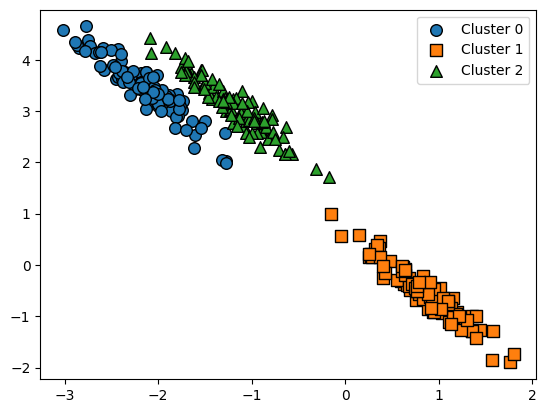

In [13]:
# 3개의 n_components 기반 GMM을 X_aniso 데이터 세트에 적용
gmm = GaussianMixture(n_components=3, random_state=0)
gmm_label = gmm.fit(X_aniso).predict(X_aniso)
clusterDF['gmm_label'] = gmm_label

# GaussianMixture는 cluster_centers_ 속성이 없으므로 iscenter를 False로 설정.
visualize_cluster_plot(gmm, clusterDF, 'gmm_label', iscenter=False)

In [14]:
# make_blobs()의 target값과 KMeans, GMM의 군집 label 값 비교
print('### KMeans Clustering ###')
print(clusterDF.groupby('target')['kmeans_label'].value_counts())
print('### GMM Clustering ###')
print(clusterDF.groupby('target')['gmm_label'].value_counts())

### KMeans Clustering ###
target  kmeans_label
0       2                73
        0                27
1       1               100
2       0                86
        2                14
Name: count, dtype: int64
### GMM Clustering ###
target  gmm_label
0       2            100
1       1            100
2       0            100
Name: count, dtype: int64


KMeans의 경우 군집 1번만 정확히 매핑됐지만 나머지 군집의 경우 target값과 어긋나는 경우가 발생하고 있다.

그러나 GMM의 경우는 군집이 target값과 잘 매핑돼있다.